In [88]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [144]:
df_test = pd.read_csv('blr_test_controls_metrics_17K.csv')

In [183]:
df_transfer_opn = pd.read_csv('blr_transfer_opn_metrics_22K.csv')

In [184]:
df_transfer_sz = pd.read_csv('blr_transfer_umich_cobre_metrics_22K.csv')

In [147]:
sns.set_theme(style="whitegrid", palette="muted")

(-2.5, 2.5)

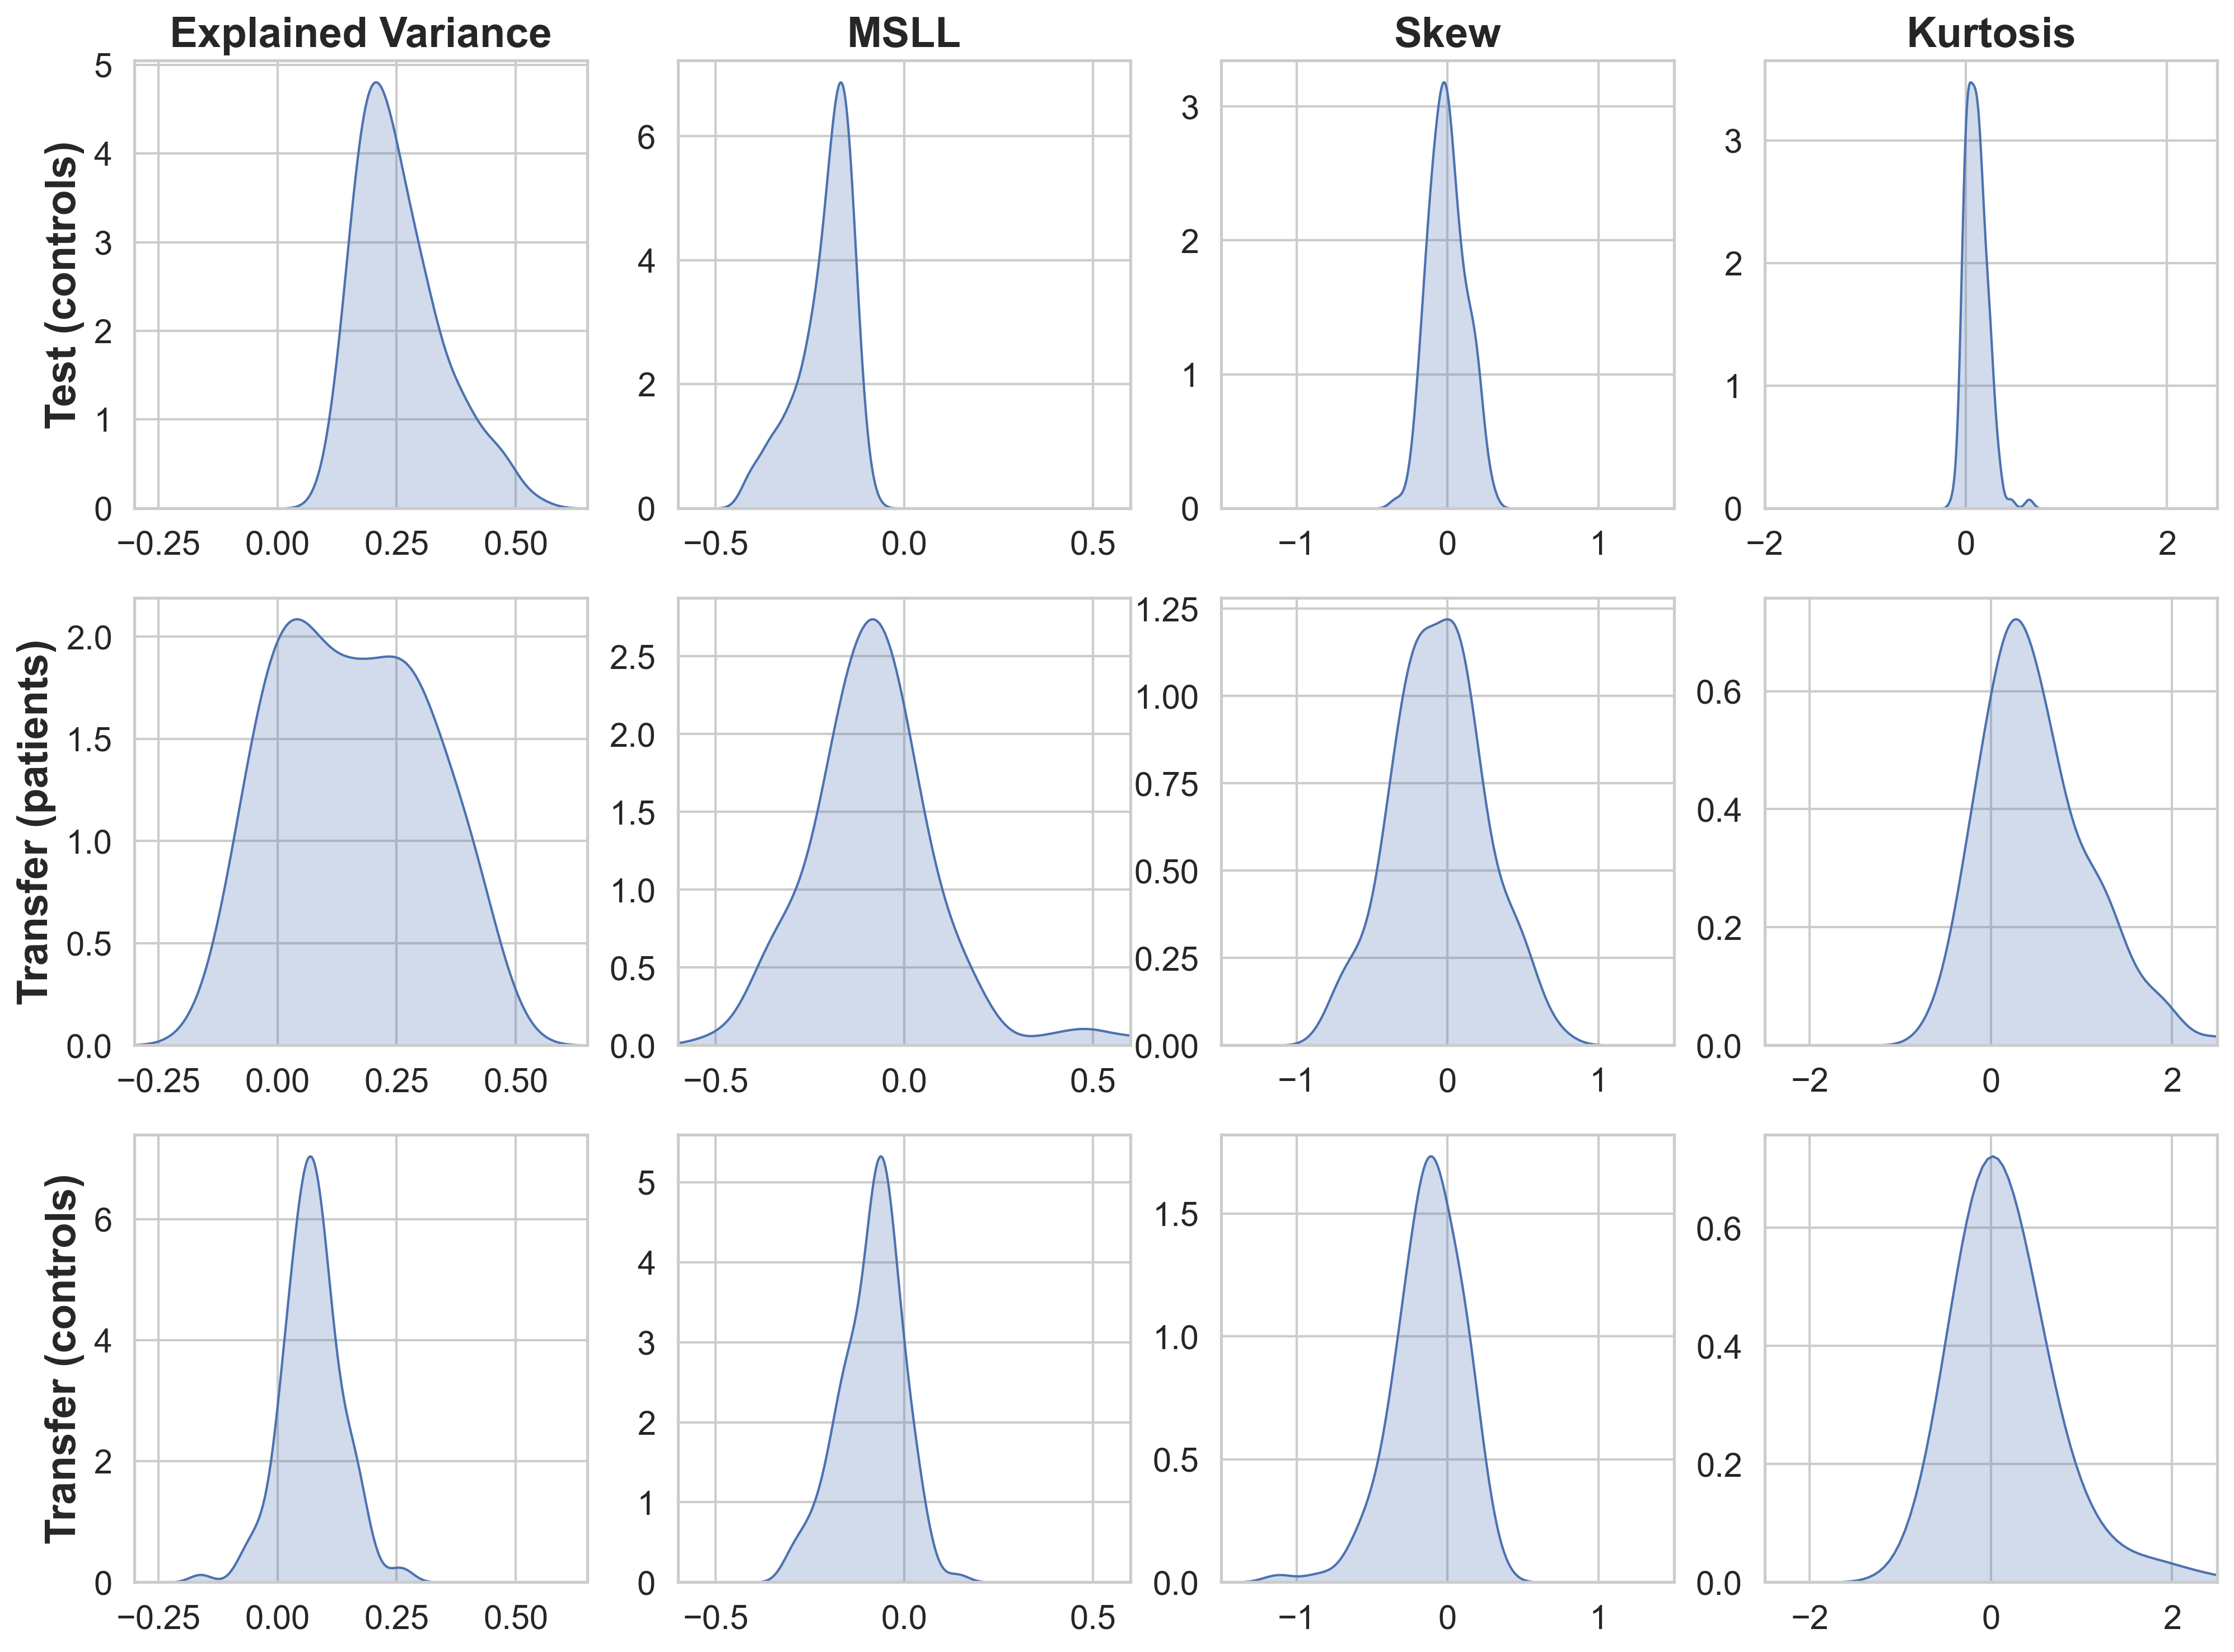

In [224]:
# Full sample evaluation metrics (Figure 3, top row)
fig, axs = plt.subplots(3, 4,figsize=(16,12), dpi=300)
sns.kdeplot(x=df_test['EV'], fill=True, ax=axs[0,0],legend=False);
axs[0,0].set_title('Explained Variance', fontsize=18, fontweight='bold')
axs[0,0].set_ylabel('Test (controls)', fontsize=18, fontweight='bold')
axs[0,0].set_xlabel('')
axs[0,0].set_xlim(-0.3,0.65)
sns.kdeplot(x=df_test['MSLL'], fill=True, ax=axs[0,1],legend=False);
axs[0,1].set_title('MSLL', fontsize=18, fontweight='bold')
axs[0,1].set_ylabel('')
axs[0,1].set_xlabel('')
axs[0,1].set_xlim(-0.6,0.6)
sns.kdeplot(x=df_test['Skew'], fill=True, ax=axs[0,2],legend=False);
axs[0,2].set_title('Skew', fontsize=18, fontweight='bold')
axs[0,2].set_ylabel('')
axs[0,2].set_xlabel('')
axs[0,2].set_xlim(-1.5,1.5)
sns.kdeplot(x=df_test['Kurtosis'], fill=True, ax=axs[0,3]);
axs[0,3].set_title('Kurtosis', fontsize=18, fontweight='bold')
axs[0,3].set_ylabel('')
axs[0,3].set_xlabel('')
axs[0,3].set_xlim(-2,2.5)
sns.kdeplot(x=df_transfer_sz['EV'], fill=True, ax=axs[1,0],legend=False);
axs[1,0].set_ylabel('Transfer (patients)', fontsize=18, fontweight='bold')
axs[1,0].set_xlabel('')
axs[1,0].set_xlim(-0.3,0.65)
sns.kdeplot(x=df_transfer_sz['MSLL'], fill=True, ax=axs[1,1],legend=False);
axs[1,1].set_ylabel('')
axs[1,1].set_xlabel('')
axs[1,1].set_xlim(-0.6,0.6)
sns.kdeplot(x=df_transfer_sz['Skew'], fill=True, ax=axs[1,2],legend=False);
axs[1,2].set_ylabel('')
axs[1,2].set_xlabel('')
axs[1,2].set_xlim(-1.5,1.5)
sns.kdeplot(x=df_transfer_sz['Kurtosis'], fill=True, ax=axs[1,3],legend=False);
axs[1,3].set_ylabel('')
axs[1,3].set_xlabel('')
axs[1,3].set_xlim(-2.5,2.5)
sns.kdeplot(x=df_transfer_opn['EV'], fill=True, ax=axs[2,0],legend=False);
axs[2,0].set_ylabel('Transfer (controls)', fontsize=18, fontweight='bold')
axs[2,0].set_xlabel('')
axs[2,0].set_xlim(-0.3,0.65)
sns.kdeplot(x=df_transfer_opn['MSLL'], fill=True, ax=axs[2,1],legend=False);
axs[2,1].set_ylabel('')
axs[2,1].set_xlabel('')
axs[2,1].set_xlim(-0.6,0.6)
sns.kdeplot(x=df_transfer_opn['Skew'], fill=True, ax=axs[2,2],legend=False);
axs[2,2].set_ylabel('')
axs[2,2].set_xlabel('')
axs[2,2].set_xlim(-1.5,1.5)
sns.kdeplot(x=df_transfer_opn['Kurtosis'], fill=True, ax=axs[2,3],legend=False);
axs[2,3].set_ylabel('')
axs[2,3].set_xlabel('')
axs[2,3].set_xlim(-2.5,2.5)

In [186]:
test_ev_arr = df_test['EV'].to_numpy()

In [187]:
restored = np.zeros((17,17))
restored[np.triu_indices(17,k=1)] = test_ev_arr
#restored += restored.T # uncomment this line if you want the symmetric matrix, if you want the upper triangle only, leave this line commented out

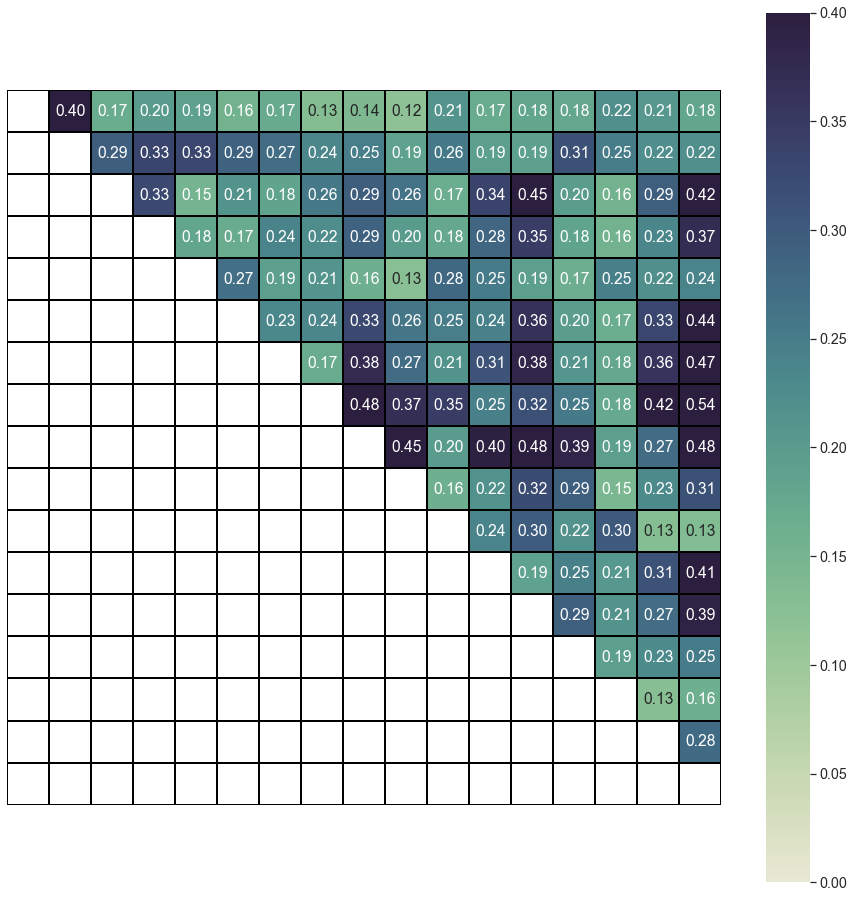

In [215]:
fig, ax = plt.subplots(figsize=[16,16])
sns.set_theme(style="whitegrid", font_scale=1.3)
cmap = sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.75, light=.9)
axr = sns.heatmap(restored, annot=True, ax=ax, linewidth=0.1, linecolor='black', square=True, mask=(restored==0), fmt="0.2f", cmap=cmap, xticklabels=False, yticklabels=False, vmin=0, vmax=0.4);

In [212]:
test_ev_arr2 = df_transfer_sz['EV'].to_numpy()

In [213]:
restored2 = np.zeros((17,17))
restored2[np.triu_indices(17,k=1)] = test_ev_arr2
#restored += restored.T # uncomment this line if you want the symmetric matrix, if you want the upper triangle only, leave this line commented out

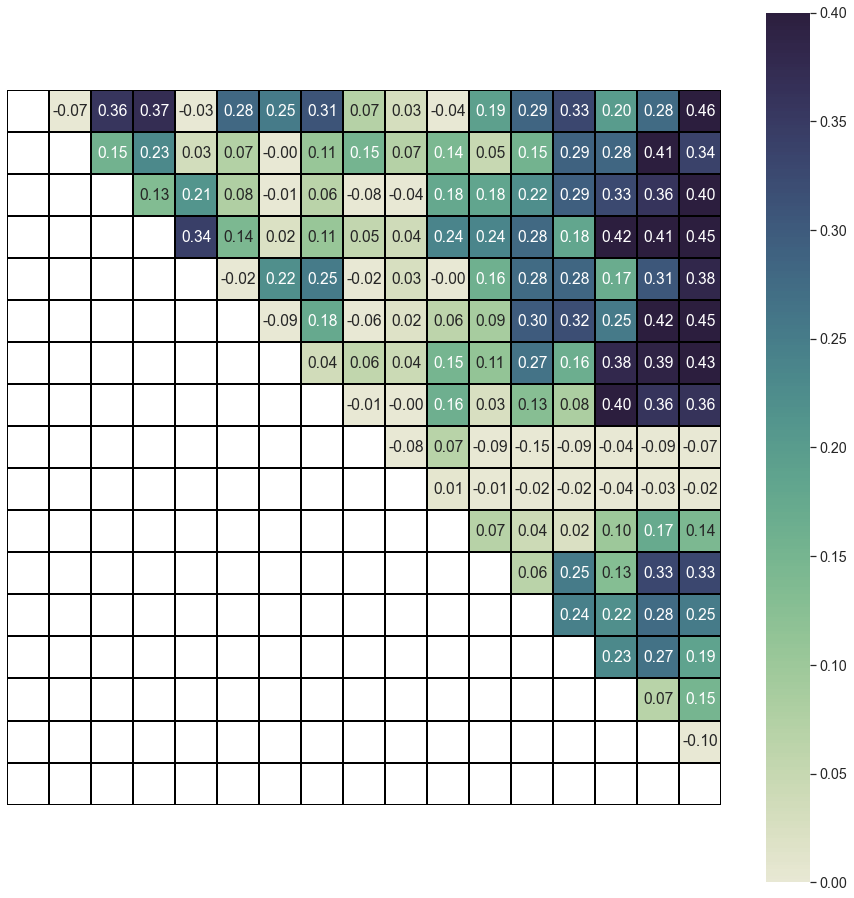

In [214]:
fig, ax = plt.subplots(figsize=[16,16])
sns.set_theme(style="whitegrid", font_scale=1.3)
cmap = sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.75, light=.9)
axr = sns.heatmap(restored2, annot=True, fmt="0.2f", ax=ax,  linewidth=0.1, linecolor='black', square=True, mask=(restored2==0), cmap=cmap, xticklabels=False, yticklabels=False, vmin=0, vmax=0.4);

In [209]:
test_ev_arr3 = df_transfer_opn['EV'].to_numpy()

In [210]:
restored3 = np.zeros((17,17))
restored3[np.triu_indices(17,k=1)] = test_ev_arr3
#restored += restored.T # uncomment this line if you want the symmetric matrix, if you want the upper triangle only, leave this line commented out

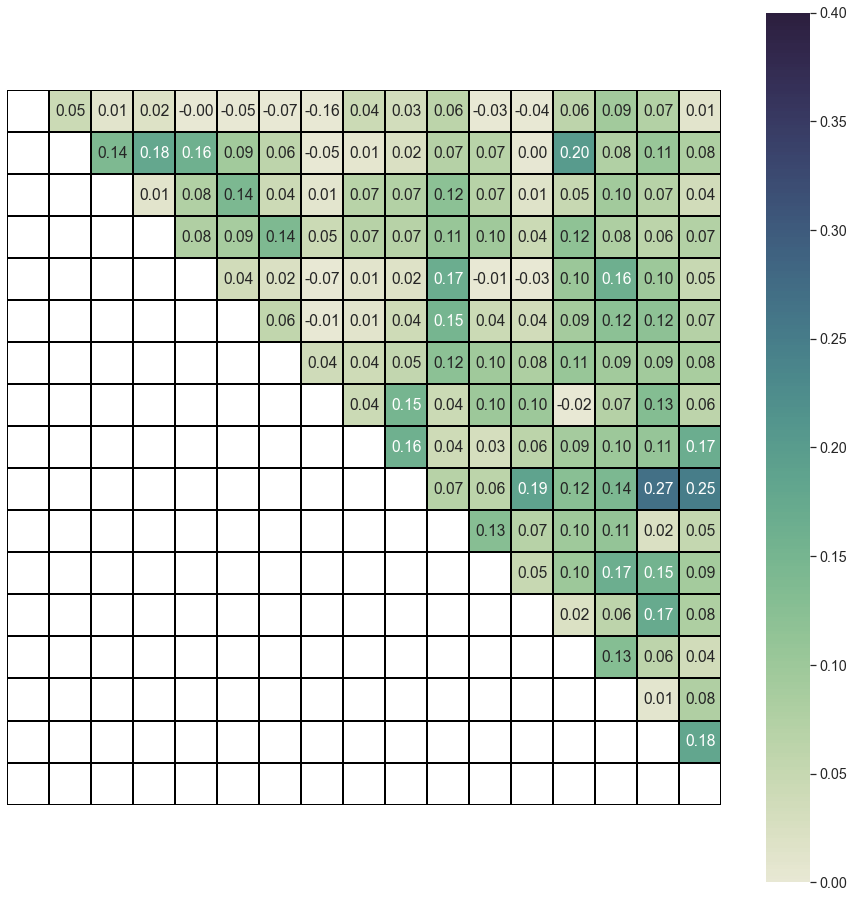

In [211]:
fig, ax = plt.subplots(figsize=[16,16])
sns.set_theme(style="whitegrid", font_scale=1.3)
cmap = sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.75, light=.9)
axr = sns.heatmap(restored3, annot=True, fmt="0.2f", ax=ax,  linewidth=0.1, linecolor='black', square=True, mask=(restored3==0), cmap=cmap, xticklabels=False, yticklabels=False, vmin=0, vmax=0.4);